# U.S. Bank Failure Analysis 

Data: https://catalog.data.gov/dataset/fdic-failed-bank-list


The inspiration for project comes from my curiosity about recurring financial and economic problems especially after the recent 2008 recession. I will be focusing more on this period of the data from 2000-2017. The data dates back to 1934 and expresses the following values:

**1. Institution name and FIN number

**2. Charter type

**3. Location of headquarters (city and state)

**4. Effective date

**5. Insurance fund and certificate number

**6. Failure transaction type

**7. Total deposits and total assets last reported prior to failure (in thousands of dollars)


There are several challenges to this dataset. 

**1, different periods will have to be excluded from different forms of analysis. For instance:

Estimated cost of resolution (Data on estimated losses are not available for FDIC insured failures prior to 1986 or for FSLIC insured failures from 1934-88. The data in this period from 1934-88 can be included in all forms of interpretation except where estimated loss data is needed.
I will consider the failures after 1988 where data exists for estimated losses as significant.

**2, a large dataset with many values which values to consider, took some time. I focused on Instituion Name (not fin number),Charter Type,Location of headquarters (city and state), and Total deposits and total assets last reported prior to failure (in thousands of dollars)

**3, I believe that the correlation between other variables can be significant. This is because they do not fit the narrative that I am striving to convey.

**4, For the purposes of this project I am limited to the values within the confines of the dataset. I am keen on merging this dataset with others that might serve to enrich the alaysis of this report. 

Looking forward toward future work on bank failures. 
I beleive that further research in this subject will prove useful for my work in the fintech ispace where this kind of historical analysis can be beneficial to gaining meaningful insights.

# Analytic Questions

1. How have institution failures changed over time; which institution is most likely to fail? 

2. How expensive were institution failures in each period relative to other periods?

3. Which states had the highest failures; which cost the government the most to resolve?

In [8]:
# Importing the necessary libraries to organize the data into a meaningful story through 
#the combination of statistical, visual, and narrative story telling tools.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sy
from scipy.stats.stats import pearsonr
%matplotlib inline

In [9]:
# Reading the banks.csv file stored in my desktop
banks = pd.read_csv('banks.csv')

In [10]:
#I want to note the size of the dataset at the start to show that we are working with a starndard sized dataset to analyze
len(banks)

3484

In [30]:
#Calling up the top 5 banks to see how the data and its values are organized in an array
banks.head()

Text(0.5,0.98,'Table 1')

In [12]:
#Extracting out failure year; organizing the formatting of the values city and state.
banks['Failure Year']=banks['Failure Date'].apply(lambda x: int(x.split('/')[2]))
banks['City']=banks['Headquarters'].apply(lambda x:(x.split(',')[0]))
banks['State']=banks['Headquarters'].apply(lambda x:(x.split(', ')[1]))

In [26]:
#To futher clean the data, I soft out how much numerical data is present
banks.isnull().sum()

Text(0.5,0.98,'Table 2')

In [31]:
#Summary Statistics, these summarize and inform on the following values in my dataset
banks[['Total Deposits', 'Total Assets', 'Estimated Loss (2015)']].describe()

,Total Deposits,Total Assets,Estimated Loss (2015)
count,3.484000e+03,3.333000e+03,2.509000e+03
mean,2.997762e+05,4.045884e+05,7.064435e+04
std,3.304676e+06,5.454873e+06,3.305872e+05
min,0.000000e+00,1.400000e+01,-4.386000e+03
25%,1.229300e+04,1.505100e+04,3.852000e+03
50%,4.172100e+04,4.752300e+04,1.335400e+04
75%,1.562415e+05,1.734780e+05,4.458500e+04
max,1.882608e+08,3.070216e+08,1.243800e+07


# Analytic Question 1 
**How have bank failures changed over time? And which institution, Commercial Bank, Savings Association, or Savings Bank is more likely to fail?**

To more clearly understand how bank failures changed over time I grouped the data by institution type. The type of institution is significant because the banks aggregated in this dataset aren't just banks, they are distinctly different institutions that serve different uses.

So, even though the term bank and institution will be used synonymously it's important for the reasons already stated to seperate these institutions out to discover how they each contribute to the failure of banks across the nation and over time.

The following summary stat displays the mean losses of each bank and the count of failed banks for each Institution Type.

In [29]:
banks.groupby(['Institution Type'])['Estimated Loss (2015)'].agg(['mean', 'count'])
fig.suptitle('Graph 1', fontsize=14, fontweight='bold')

,mean,count
Institution Type,,
COMMERCIAL BANK,41835.451513,1619
SAVINGS ASSOCIATION,106485.405594,572
SAVINGS BANK,152847.254717,318


It's surprising to see the pattern that's emerged from this array. It seems to show an inverse relationship between the mean losses and the count. It looks as though savings banks have the least number of failures while also being responsible for the most losses. Commercial banks have the highest failure count and are responsible for the least amount of losses. 

From this I can conclude:

1. That the bank most likely to incur the highest average losses and lowest frequency of failure is the Savings Bank. 

2. The bank with the highest frequency of failures and the lowest average losses is the commercial bank.

Below I created a histogram showing how bank failures have changed over time. This time frame beginning in 1934 when the FDIC was founded and ending in 2015.

Text(0.5,0.98,'Figure 1')

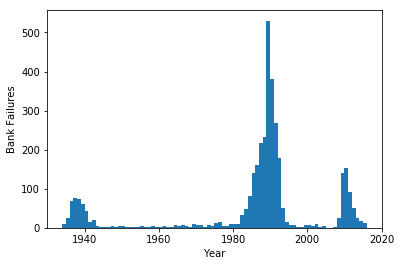

In [23]:
plt.hist(banks['Failure Year'], bins=range(1934,2017))
plt.xlabel('Year')
plt.ylabel('Bank Failures')

fig = plt.figure()
fig.suptitle('Figure 1', fontsize=14, fontweight='bold')

The histogram above (figure 1) clearly clusters around three periods of time 1940's, 1980's-1990's, and the early 2000's where US bank failures were the highest in history. This provides a general sense of which periods of time held the most failures. This raises and important question:

1. Which types of banks are responsible for each of these major periods of failure?


The plot below (figure 2) is the next step to finding the answer to the above question. In this plot each institution is spereated out from each other and graphed over time. This makes it easier to compare, especially with different colored markers for corresponding banks via one plot with each kind of bank charted and superimposed upon each other.

Text(0.5,0.98,'Figure 2')

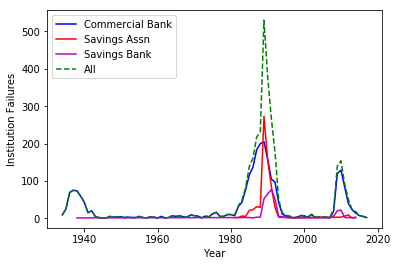

In [22]:
failure_year_type = banks.groupby(['Failure Year', 'Institution Type'], as_index=False)['Institution Name'].agg('count')
failure_year_type.columns=['Failure Year', 'Institution Type', 'Number of Failures']

failure_year_comm = failure_year_type[failure_year_type['Institution Type']=='COMMERCIAL BANK']
failure_year_savea = failure_year_type[failure_year_type['Institution Type']=='SAVINGS ASSOCIATION']
failure_year_saveb = failure_year_type[failure_year_type['Institution Type']=='SAVINGS BANK']


failure_year_all = failure_year_type[(failure_year_type['Institution Type']=='COMMERCIAL BANK') | (failure_year_type['Institution Type']=='SAVINGS ASSOCIATION') | (failure_year_type['Institution Type']=='SAVINGS BANK')]
failure_year_all = failure_year_all.groupby('Failure Year', as_index=False)['Number of Failures'].agg('sum')

plt.plot(failure_year_comm['Failure Year'], failure_year_comm['Number of Failures'], 'b-')
plt.plot(failure_year_savea['Failure Year'], failure_year_savea['Number of Failures'], 'r-')
plt.plot(failure_year_saveb['Failure Year'], failure_year_saveb['Number of Failures'], 'm-')
plt.plot(failure_year_all['Failure Year'], failure_year_all['Number of Failures'], 'g--')



plt.xlabel('Year')
plt.ylabel('Institution Failures')
plt.legend(['Commercial Bank', 'Savings Assn', 'Savings Bank', 'All'])
fig.suptitle('Figure 2', fontsize=14, fontweight='bold')

The plot above shows how in the beginning commercial banks were largely responsible for the most failures in the fisrt period. This changes in the second period when savings associations take on this burden where at their peak out failed commercial banks. In the third period the commercial banks take the lead in failures once again emulating the patterned from period 1. It can be concluded that the period of the 1980's recession had the most failures. Saving association banks failed more that commercial and Savings banks on avergage but not in every peiod. Since we know that during the 1930's - 40's, commercial banks were the biggest failures. And the recent recession of the 2000's show a similar pattern to that of the great depression where commercial banks also failed most.

Want to show statistically that the Estimated Loss for the various types of banks are different. T-test doesn't apply since data not normal. So, we use the pearson test on Estimated Loss (2015)

In [56]:
from scipy.stats import mannwhitneyu 

savings_assn = banks[banks['Institution Type']=='SAVINGS ASSOCIATION']
savings = banks[banks['Institution Type']=='SAVINGS BANK']
commercial = banks[banks['Institution Type']=='COMMERCIAL BANK']

u, p = mannwhitneyu(savings_assn['Estimated Loss (2015)'], savings_assn['Estimated Loss (2015)'])
print((u, p))


u, p = mannwhitneyu(savings['Estimated Loss (2015)'], savings['Estimated Loss (2015)'])
print((u, p))


u, p = mannwhitneyu(commercial['Estimated Loss (2015)'], commercial['Estimated Loss (2015)'])
print((u, p))

(236837.0, 0.39877022445475974)
(53753.0, 0.49367152926755947)
(2719804.5, 9.4379580737865157e-11)


## Analytic Question 2 
**Which bank cost the government most to resolve in each period, relative to others across all periods?**

It's already clear which general periods of time the majority of financial institutions failed, but we don't know the financial loss of those biggest failures in each period. Nor do we yet know how that largest bank compares to the second, third, fourth biggest failures in each period. Do any interesting patterns emerge?

It's important to note that loss and cost are also synonymous with each other representing the cost to the government.

Being that there isn't enough data on estimated losses (2015) I've decided to import an inflation multiplier to adjust total assets for inflation and use this new measurement as a proxy for losses across all periods.

Using this new measurement to compare and contrast losses; we divide the data into "ranges" of time. These specific ranges will be as follows: year_range_1(1934, 1943) year_range_2(1980, 1990) year_range_3(2000, 2015)

These ranges are in keeping with the time frames we sorted earlier in answering question one where a histogram can show you those ranges more clearly (ref figure 1 above)

Below is where we read the file and define the new banks_inflation data frame and see the values that the data is organized under.

In [33]:
conversion_df = pd.read_csv('inflation.csv')
banks_inflation = pd.merge(banks, conversion_df, left_on='Failure Year', right_on='year')
banks_inflation.columns

Index(['Financial Institution Number', 'Institution Name', 'Institution Type',
       'Charter Type', 'Headquarters', 'Failure Date', 'Insurance Fund',
       'Certificate Number', 'Transaction Type', 'Total Deposits',
       'Total Assets', 'Estimated Loss (2015)', 'Failure Year', 'City',
       'State', 'year', 'inflation_multiplier'],
      dtype='object')

Two primary sub goals are as follows:

1. We create a table that converts 2015 vals to 2017 vals; 2017 values are what I chose so as to be as current as possible to a ubiquitious inflation rate.

2. We then sort the values by Institution Name and Total Assets (2015) and we plot those values to compare their bar plots to determine if there is a correlation. 


In the following cell's block of code I attempted to test two data samples; 'Total Assets (2015)', and 'Estimated Loss (2015)'. I implemented the following peasrson test for normal distribution, since the data are normally distibuted.

0.153710307701 9.82136388207e-15


Text(0.5,0.98,'Figure 3')

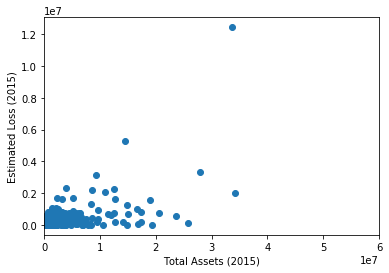

In [35]:
banks_inflation['Total Assets (2015)']=banks_inflation['Total Assets']*banks_inflation['inflation_multiplier'] 
plt.scatter(banks_inflation['Total Assets (2015)'], banks_inflation['Estimated Loss (2015)']) 
plt.xlabel('Total Assets (2015)') 
plt.ylabel('Estimated Loss (2015)') 
plt.xlim([0, 0.6e8])

bankst = banks_inflation.dropna(subset=['Total Assets (2015)', 'Estimated Loss (2015)', 'Total Assets']) 
x, y = pearsonr(bankst['Total Assets'], bankst['Estimated Loss (2015)']) 
print(x, y)

fig.suptitle('Figure 3', fontsize=14, fontweight='bold')

Above most of the banks(data points) on htis graph cluster between 0 and 1 for assets and 0 and .2 for Losses. Addionally the pearson r coefficient is 0.1537 which is positive. This implies that there is a positive correlation between Total Assests and Estimated Loss. As one goes up the other does as well and vice versa. 

Below I've created summary statistics for each variable we tested for, Estimated Loss (2015), and Total Assets. This is to show how differently distributed these two values were before we brought the two sets of data together to compare.

In [59]:
banks.groupby(['Institution Type'])['Estimated Loss (2015)'].describe()

,count,mean,std,min,25%,50%,75%,max
Institution Type,,,,,,,,
COMMERCIAL BANK,1619.0,41835.451513,139013.822067,0.0,3180.00,8857.0,30081.0,3330263.0
SAVINGS ASSOCIATION,572.0,106485.405594,282282.109304,-551.0,7208.00,24116.0,73533.5,3142552.0
SAVINGS BANK,318.0,152847.254717,780479.657822,-4386.0,7977.25,25392.5,93980.5,12438005.0


In [60]:
banks.groupby(['Institution Type'])['Total Assets'].describe()

,count,mean,std,min,25%,50%,75%,max
Institution Type,,,,,,,,
COMMERCIAL BANK,2315.0,1.795535e+05,8.938253e+05,14.0,9706.0,27090.0,98846.0,25455112.0
SAVINGS ASSOCIATION,691.0,4.505859e+05,1.084308e+06,4816.0,54397.5,127005.0,319666.0,13382327.0
SAVINGS BANK,327.0,1.900526e+06,1.712776e+07,4008.0,64505.0,174717.0,643582.5,307021614.0


Below we sort the values adjeusted for inflation by Institution Name and Total Assets (2015). 
Then we plot those values and compare the bar plots of each period of time. These peiods are labled as ranges of time in the code below for instance the first period is "range(1934, 1943)". The corresponding graphs for each period or "range" is also found below starting with the aformentioned range from left to right. My goal for these graphs is to convey the scale of how removed the largest failed bank's assets are to the next.

Text(0.5,0.98,'Figure 4')

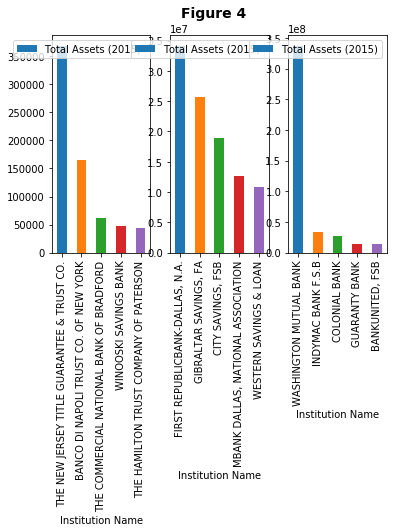

In [37]:
banks_inflation['Total Assets (2015)']=banks_inflation['Total Assets']*banks_inflation['inflation_multiplier']
year_range_1 = range(1934, 1943)
year_range_2 = range(1980, 1990)
year_range_3 = range(2000, 2015)
banks_1 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_1)].sort_values('Total Assets (2015)', ascending=False).head(5)
banks_2 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_2)].sort_values('Total Assets (2015)', ascending=False).head(5)
banks_3 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_3)].sort_values('Total Assets (2015)', ascending=False).head(5)

fig, axes = plt.subplots(nrows=1, ncols=3)
banks_1.plot.bar(x='Institution Name', y='Total Assets (2015)', ax=axes[0]), 
banks_2.plot.bar(x='Institution Name', y='Total Assets (2015)', ax=axes[1]), 
banks_3.plot.bar(x='Institution Name', y='Total Assets (2015)', ax=axes[2]), 

fig.suptitle('Figure 4', fontsize=14, fontweight='bold')

The biggest asset bank is quite removed from the other banks. In the first period the largest bank is removed from the others by a factor of 2. In the second not by much, maybe by 500,000. In the third by a factor of 7. This is a glaring difference. Below this difference is represented as a percent of the largest failed bank's Total Assets.

Text(0.5,0.98,'Figure 5')

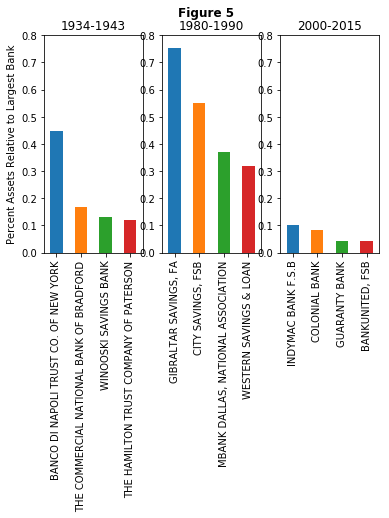

In [40]:
banks_inflation['Total Assets (2015)']=banks_inflation['Total Assets']*banks_inflation['inflation_multiplier']
year_range_1 = range(1934, 1943)
year_range_2 = range(1980, 1990)
year_range_3 = range(2000, 2015)
banks_1 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_1)].sort_values('Total Assets (2015)', ascending=False).head(5)
#banks_1 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_1)].sort_values('Total Assets (2015)', ascending=False).iloc[1:5] 
banks_1['total_assets_normalized']=banks_1['Total Assets (2015)']/banks_1['Total Assets (2015)'].iloc[0]
banks_1 = banks_1.iloc[1:5]

banks_2 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_2)].sort_values('Total Assets (2015)', ascending=False).head(5)
#banks_2 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_2)].sort_values('Total Assets (2015)', ascending=False).iloc[1:5]
banks_2['total_assets_normalized']=banks_2['Total Assets (2015)']/banks_2['Total Assets (2015)'].iloc[0]
banks_2 = banks_2.iloc[1:5]


banks_3 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_3)].sort_values('Total Assets (2015)', ascending=False).head(5) 
#banks_3 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_3)].sort_values('Total Assets (2015)', ascending=False).iloc[1:5]
banks_3['total_assets_normalized']=banks_3['Total Assets (2015)']/banks_3['Total Assets (2015)'].iloc[0]
banks_3 = banks_3.iloc[1:5]

fig, axes = plt.subplots(nrows=1, ncols=3)
banks_1.plot.bar(x='Institution Name', y='total_assets_normalized', ax=axes[0],legend=False, ylim=(0,.8),title='1934-1943')

banks_2.plot.bar(x='Institution Name', y='total_assets_normalized', ax=axes[1],legend=False, ylim=(0,.8),title='1980-1990')


banks_3.plot.bar(x='Institution Name', y='total_assets_normalized', ax=axes[2],legend=False, ylim=(0,.8),title='2000-2015')

axes[0].set_xlabel("")
axes[0].set_ylabel("Percent Assets Relative to Largest Bank")
axes[1].set_xlabel("")
axes[2].set_xlabel("")

fig.suptitle('Figure 5', fontsize=12, fontweight='bold')

In the first period the size of the assets of the next largest bank (Banco Di Napoli CO. of New York) is about 45% of the assets of the first largest bank (The New Jersey Title Guarantee & Trust CO.)

Gibraltar Savings, FA is a little more than 75% of First RepublicBank-Dallas, N.A. in the second period

In the third period we see again that Indymac bank F.S.B. pails in comparison of the largest bank to fail in its period of history as a mere 10% of Washington Mutual Bank.

In [63]:
banks_inflation.groupby(['Institution Type'])['Total Assets (2015)'].agg(['mean','std','count'])

,mean,std,count
Institution Type,,,
COMMERCIAL BANK,2.673818e+05,1.356841e+06,2315
SAVINGS ASSOCIATION,8.367140e+05,2.014593e+06,691
SAVINGS BANK,2.482396e+06,1.890531e+07,327


## Analytic Question 3
**How have bank failures changed by state over time?** 

Which states had the highest failures?
Which states cost the government the most to resolve?

One challenge I face specific to this question is my understanding of what role population plays in the number of failures. Going forward Population density is a factor I'd like to include.

In this question I am building on the second question's quest to understand the cost to a state and federal government. The states are seperated from each other into ranges. Then into three subplots of each range to discover which state in fact had the highest failures and cost the most to resolve in each period. This is the goal. 

What cost they incured collectively as a state rather than which type of institution and which bank specifically was responsible. First I attempt to remind how large problem is so far. Below is the output of all the failed banks.

In [64]:
len(banks)

3484

Of the 3,484 financial failed institutions in this dataset, which states had the highest failures? Which state is essentially the most failed state in the context of this project?

First I generated a table of the states with the highest bank failures and their correspoding failure count under the value for "Institution Name". After that, I decided to graph two histograms; the first of all the Bank Failures ordered alphapetically by State.

And the second histogram is ordered by "Institution Name" which represents the failure count. This is more important because the failure count is now organized in a way that shows clearly how much larger the first state failure count is from the second, third, fourth, and so on. This is similar to the pattern that emerged with the institution's individual size in terms of Total Assets.

In [62]:
banks_by_state.sort_values(by='Institution Name', ascending=False).iloc[0:5]

,State,Institution Name
44,TX,736
4,CA,236
14,IL,181
9,FL,178
37,OK,170


Text(0.5,0.98,'Figure 6')

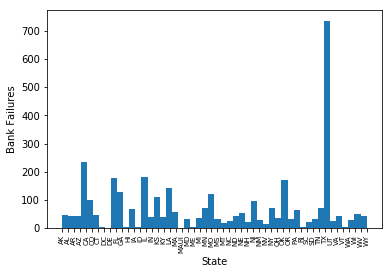

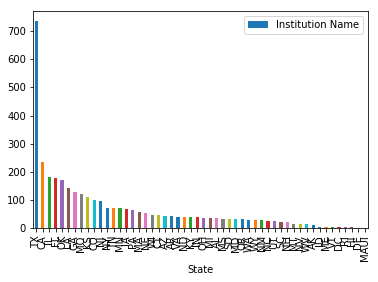

In [64]:
plt.hist(banks['State'],bins=50)
plt.xticks(fontsize=7,rotation=90)
plt.xlabel('State')
plt.ylabel('Bank Failures')

banks_by_state = banks.groupby('State', as_index=False)['Institution Name'].agg('count').sort_values(by='Institution Name',ascending=False)
banks_by_state.plot.bar(x='State',y='Institution Name')
fig.suptitle('Figure 6', fontsize=14, fontweight='bold')

From the histograms and table above we find that Texas is by far the state with the largest failing bank by average bank failures in the USA of any type and across any period of time. The next largest average failing bank is California at nearly five times less Total Assets than Texas. The third largest failing State, Illinois is even more removed from CA. The total assets gradually decreases from there. New York is half that of Illinois. 

Below I created subplots for each period and the failure counts for each state. This will show who the was responsible for the highest failures and also cost the government the most to resolve.

Text(0.5,0.98,'Figure 7')

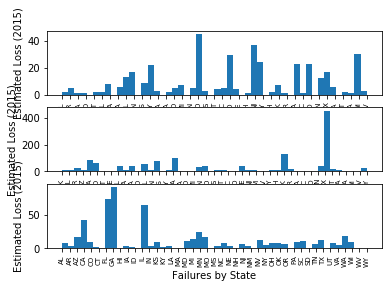

In [59]:
banks_inflation['Total Assets (2015)']=banks_inflation['Total Assets']*banks_inflation['inflation_multiplier']
year_range_1 = range(1934, 1943)
year_range_2 = range(1980, 1990)
year_range_3 = range(2000, 2015)

banks_1 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_1)]
banks_2 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_2)]
banks_3 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_3)]


plt.subplot(3,1,1)
plt.hist(banks_1['State'],bins=50)
plt.xticks(fontsize=7,rotation=90)
plt.xlabel('Failures by State')
plt.ylabel('Estimated Loss (2015)')

plt.subplot(3,1,2)
plt.hist(banks_2['State'],bins=50)
plt.xticks(fontsize=7,rotation=90)
plt.xlabel('Failures by State')
plt.ylabel('Estimated Loss (2015)')

plt.subplot(3,1,3)
plt.hist(banks_3['State'],bins=50)
plt.xticks(fontsize=7,rotation=90)
plt.xlabel('Failures by State')
plt.ylabel('Estimated Loss (2015)')
fig.suptitle('Figure 7', fontsize=14, fontweight='bold')

Finally we discover what the losses were for all states. Then we take the average losses of each state and show this data from highest average losses to lowest losses. Texas lost 6 times as much as the next most failing state, California. And the rest of the states were relatively the similar to each other, and futher identifying those states reposinle in each period as follows:

From the first period it looks like Montana and West Virginia are the leaders in the Estimated Losses of their time period, ranging from 1934 to 1943.

In the second period, the story has changed and now Texas isn't the most responsible in this period and in face hasn't always been the largest failed state. If we look at Texas' place on the graph following it down through each graph we see that this state in fact had less losses from bank failures than West Viginia or Montana. 

Lastly and surprisingly in the third graph Florida, Georgia, and Illinois are the juggernauts of the modern age of losses. These are both small state by geography and population density and I am curious to know how this plays a role in the failure count and to the losses of the state.

To conclude bank failures in the United States have their own unique differences and those differences boil down to time, state, and total assets lost. And since we have already seen the three big periods to failures, it might be cool in the future to see how bad the worst failures of each period were in 2015 USD and to project which banks might fail in the future. 